<a href="https://colab.research.google.com/github/le-patrice/ANN/blob/main/cifar_10_cnn_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CiIFAR-10 CNN using Functional API Approach

### Step 0: Setup and Imports

In [1]:
#Step 0: Setup and Imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Step 1: Load and Preprocess Data

In [2]:
# Step 1: Load & Preprocess Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the data [0,1]
x_train , x_test = x_train.astype("float32")/255.0, x_test.astype("float32")/255.0

# Flatten labels
y_train, y_test = y_train.flatten(), y_test.flatten()

#Show datasets details
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Number of classes: 10


### Step 2: Data Augmentation

In [3]:
# Step 2: Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(.1)
    ], name='data_augmentation')

### Step 3: Define Model Functional API)

In [5]:
# Step 3: Define Model with functional API
inputs = tf.keras.Input(shape=(32,32, 3), name="input_layer")

x = data_augmentation(inputs) # <--- Apply augmentation

x = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)

x = tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)

x = tf.keras.layers.Conv2D(128, (3,3),activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(.4)(x)

outputs = tf.keras.layers.Dense(10, activation='softmax', name="output_layer")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name="CIFAR10_CNN")
model.summary()

Model: "CIFAR10_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,946 (437.29 KB)

 Trainable params: 111,498 (435.54 KB)

 Non-trainable params: 448 (1.75 KB)

### Step 4: Compile Model

In [6]:
# Step 4: Compile Model
model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

### Step 5: Train Model with callbacks

In [8]:
# Step5 : Training Model with callbacks
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "best_cifar10_model.h5", save_best_only=True, monitor="val_accuracy"
)
history = model.fit(
    x_train, y_train,
    epochs = 20,
    batch_size = 64,
    validation_split = .2,
    callbacks=[early_stop, checkpoint],
    verbose=2
)

Epoch 1/20


625/625 - 7s - 11ms/step - accuracy: 0.6328 - loss: 1.0420 - val_accuracy: 0.6260 - val_loss: 1.0834
Epoch 2/20


625/625 - 6s - 10ms/step - accuracy: 0.6478 - loss: 0.9970 - val_accuracy: 0.6617 - val_loss: 0.9700
Epoch 3/20
625/625 - 7s - 11ms/step - accuracy: 0.6650 - loss: 0.9635 - val_accuracy: 0.6205 - val_loss: 1.0952
Epoch 4/20
625/625 - 7s - 11ms/step - accuracy: 0.6747 - loss: 0.9301 - val_accuracy: 0.6522 - val_loss: 1.0261
Epoch 5/20
625/625 - 7s - 12ms/step - accuracy: 0.6846 - loss: 0.9034 - val_accuracy: 0.6550 - val_loss: 1.0264
Epoch 6/20


625/625 - 7s - 12ms/step - accuracy: 0.6939 - loss: 0.8771 - val_accuracy: 0.6896 - val_loss: 0.9027
Epoch 7/20
625/625 - 8s - 14ms/step - accuracy: 0.6995 - loss: 0.8627 - val_accuracy: 0.6668 - val_loss: 0.9522
Epoch 8/20
625/625 - 8s - 12ms/step - accuracy: 0.7094 - loss: 0.8386 - val_accuracy: 0.6730 - val_loss: 0.9437
Epoch 9/20


625/625 - 7s - 12ms/step - accuracy: 0.7160 - loss: 0.8199 - val_accuracy: 0.7184 - val_loss: 0.8379
Epoch 10/20
625/625 - 7s - 11ms/step - accuracy: 0.7218 - loss: 0.8047 - val_accuracy: 0.6610 - val_loss: 1.0057
Epoch 11/20
625/625 - 7s - 12ms/step - accuracy: 0.7244 - loss: 0.7954 - val_accuracy: 0.6700 - val_loss: 0.9855
Epoch 12/20
625/625 - 10s - 17ms/step - accuracy: 0.7273 - loss: 0.7877 - val_accuracy: 0.7019 - val_loss: 0.8824
Epoch 13/20


625/625 - 7s - 11ms/step - accuracy: 0.7307 - loss: 0.7680 - val_accuracy: 0.7305 - val_loss: 0.7925
Epoch 14/20
625/625 - 7s - 11ms/step - accuracy: 0.7329 - loss: 0.7653 - val_accuracy: 0.6807 - val_loss: 0.9590
Epoch 15/20
625/625 - 7s - 10ms/step - accuracy: 0.7389 - loss: 0.7531 - val_accuracy: 0.7038 - val_loss: 0.9307
Epoch 16/20
625/625 - 7s - 11ms/step - accuracy: 0.7415 - loss: 0.7447 - val_accuracy: 0.7035 - val_loss: 0.8784
Epoch 17/20


625/625 - 6s - 10ms/step - accuracy: 0.7434 - loss: 0.7414 - val_accuracy: 0.7483 - val_loss: 0.7522
Epoch 18/20
625/625 - 7s - 11ms/step - accuracy: 0.7504 - loss: 0.7262 - val_accuracy: 0.7348 - val_loss: 0.7676
Epoch 19/20
625/625 - 10s - 17ms/step - accuracy: 0.7494 - loss: 0.7241 - val_accuracy: 0.6975 - val_loss: 0.8990
Epoch 20/20
625/625 - 6s - 9ms/step - accuracy: 0.7512 - loss: 0.7174 - val_accuracy: 0.7377 - val_loss: 0.7872


### Step 6: Evaluate & Visualize

Test accurarcy: 0.7440000176429749, Test loss: 0.7583636045455933


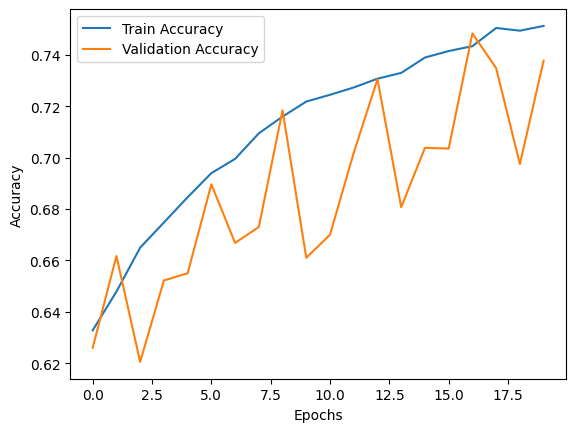

In [9]:
# Step 6: Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accurarcy: {test_acc}, Test loss: {test_loss}")

# Plot accuracy curve
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Step 7: Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


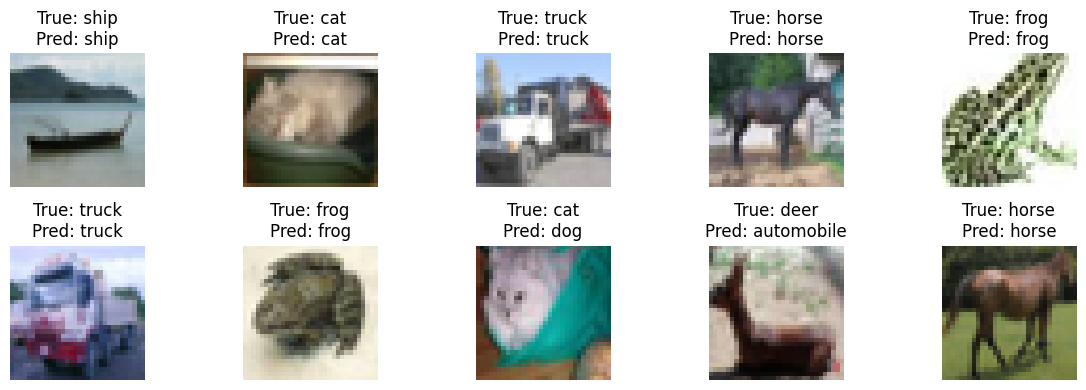

In [14]:
# Step 7: Predictions
class_names = ["airplane", "automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

idx = np.random.choice(len(x_test),10)
sample_images = x_test[idx]
sample_labels = y_test[idx]

pred_probs = model.predict(sample_images)
pred_labels = np.argmax(pred_probs, axis=1)

plt.figure(figsize=(12,4))
for i in range(10):
  plt.subplot(2,5, i+1)
  plt.imshow(sample_images[i])
  plt.title(f"True: {class_names[sample_labels[i]]}\nPred: {class_names[pred_labels[i]]}")
  plt.axis('off')
plt.tight_layout()
plt.show()